In [1]:

#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import os
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(0)

In [2]:

from sklearn import linear_model
ols = linear_model.LinearRegression()

In [3]:
data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [24]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df=data.copy()


In [6]:

df['Total_size']= df['BsmtFinSF1']+ df['BsmtFinSF2'] + df['1stFlrSF'] +df['2ndFlrSF']+df['GarageArea']

In [7]:
#create a helper for bldgtype
def helper(x):
    if x.BldgType == "TwnhsE":
        return 'Twnhs'
    else:
        return x.BldgType

In [8]:
def helper(x):
    if x.BldgType == "TwnhsE":
        return 'Twnhs'
    else:
        return x.BldgType

df['BldgType_clean']=df.apply(helper,axis=1)

In [9]:
df[['LotArea','Total_size','WoodDeckSF','OpenPorchSF','PoolArea']]


,LotArea,Total_size,WoodDeckSF,OpenPorchSF,PoolArea
0,8450,2964,0,61,0
1,9600,2700,298,0,0
2,11250,2880,0,42,0
3,9550,2575,0,35,0
4,14260,3689,192,84,0
...,...,...,...,...,...
1455,7917,2107,0,40,0
1456,13175,3526,349,0,0
1457,9042,2867,0,60,0
1458,9717,2396,366,0,0


In [10]:
df['Outdoor_Porch_Size']= df['WoodDeckSF']+df['OpenPorchSF']


In [11]:

# #helper_1
# def recent_constr(x):
#     if(x.YearBuilt < x.YearRemodAdd):
#         return x.YearRemodAdd
#     else: 
#         return x.YearBuilt

# #defining intermediate column    
# df['time_remod'] = data.apply(recent_constr,axis=1)

#helper 2
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt

#defining intermediate column 2    
df['Recent_yr'] = df.apply(recent_constr,axis=1)

#time to sale helper defined:
def time_to_sale(x):
    return x.YrSold - x.Recent_yr

#new column defined to be used in Train
df['Age_at_sale']=df.apply(time_to_sale,axis=1)

In [12]:
df['log_sales']=np.log(df['SalePrice'])


In [37]:

model2_df = df[['Total_size','LotArea','Neighborhood','BldgType_clean','OverallQual','Age_at_sale','ExterQual',
                'Outdoor_Porch_Size','YrSold','KitchenQual','Fireplaces', 'log_sales', 'SalePrice']]

In [29]:
model2light_df = df[['Total_size','LotArea','Neighborhood','OverallQual','Age_at_sale',
                'YrSold', 'log_sales']]

In [30]:
model2light_df.columns


Index(['Total_size', 'LotArea', 'Neighborhood', 'OverallQual', 'Age_at_sale',
       'YrSold', 'log_sales'],
      dtype='object')

In [27]:
model2_df.head()


,Total_size,LotArea,Neighborhood,BldgType_clean,OverallQual,Age_at_sale,ExterQual,Outdoor_Porch_Size,YrSold,KitchenQual,Fireplaces,log_sales
0,2964,8450,CollgCr,1Fam,7,5,Gd,61,2008,Gd,0,12.247694
1,2700,9600,Veenker,1Fam,6,31,TA,298,2007,TA,1,12.109011
2,2880,11250,CollgCr,1Fam,7,6,Gd,42,2008,Gd,1,12.317167
3,2575,9550,Crawfor,1Fam,7,36,TA,35,2006,Gd,1,11.849398
4,3689,14260,NoRidge,1Fam,8,8,Gd,276,2008,Gd,1,12.429216


In [31]:
model2light_df.to_csv("model2light_df.csv", index=False)

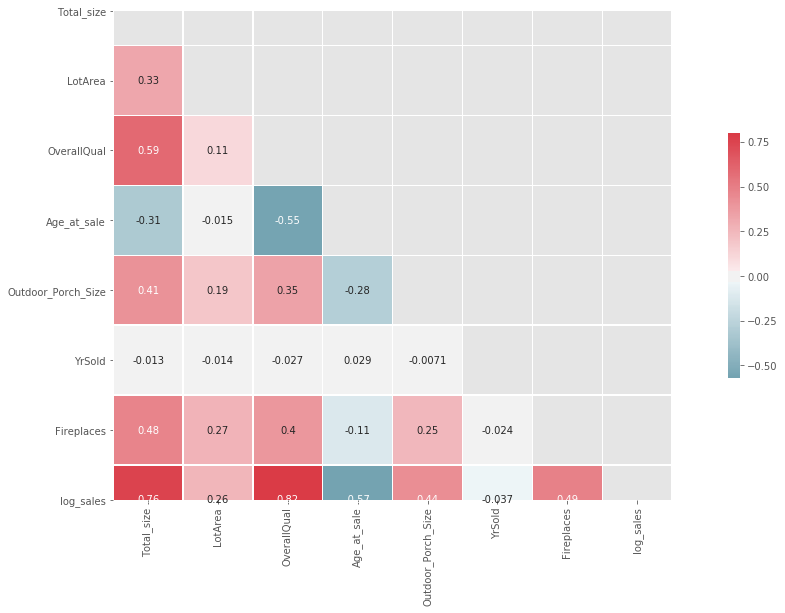

In [32]:
import seaborn as sns
# Generate a mask for the upper triangle  # using np.tril will mask the lower triangle
mask = np.triu(np.ones_like(model2_df.corr(), dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(model2_df.corr(), vmax=.8, center=0,
            square=True, linewidths=.5, mask=mask, cmap=cmap, annot=True,annot_kws={'size': 10},cbar_kws={"shrink": .5})

In [33]:
import dtale

In [38]:
d = dtale.show(model2_df, notebook = True)

Exception on /charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[

2020-02-29 18:20:55,622 - ERROR    - Exception on /charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_re

500 Internal Server Error: The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.
Traceback (most recent call last):
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/anne

2020-02-29 18:20:55,655 - ERROR    - 500 Internal Server Error: The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.
Traceback (most recent call last):
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.d

In [ ]:

# dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( model2_df[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
model2_df = pd.concat( (model2_df.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify Building Type

BldgType_clean_ohe = OneHotEncoder( drop='first', sparse = False )
BldgType_clean_enc = BldgType_clean_ohe.fit_transform( model2_df[['BldgType_clean']] )
BldgType_clean_enc = pd.DataFrame( BldgType_clean_enc, columns=BldgType_clean_ohe.get_feature_names(['BldgType_clean']) )
model2_df = pd.concat( (model2_df.drop(["BldgType_clean"], axis=1).reset_index(drop = True), BldgType_clean_enc), axis = 1 )


#dummify ExterQual

ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( model2_df[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
model2_df = pd.concat( (model2_df.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )



#dummify YrSold

YrSold_ohe = OneHotEncoder( drop='first', sparse = False )
YrSold_enc = YrSold_ohe.fit_transform( model2_df[['YrSold']] )
YrSold_enc = pd.DataFrame( YrSold_enc, columns=YrSold_ohe.get_feature_names(['YrSold']) )
model2_df = pd.concat( (model2_df.drop(["YrSold"], axis=1).reset_index(drop = True), YrSold_enc), axis = 1 )

# dummify KitchenQual
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( model2_df[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
model2_df = pd.concat( (model2_df.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )
